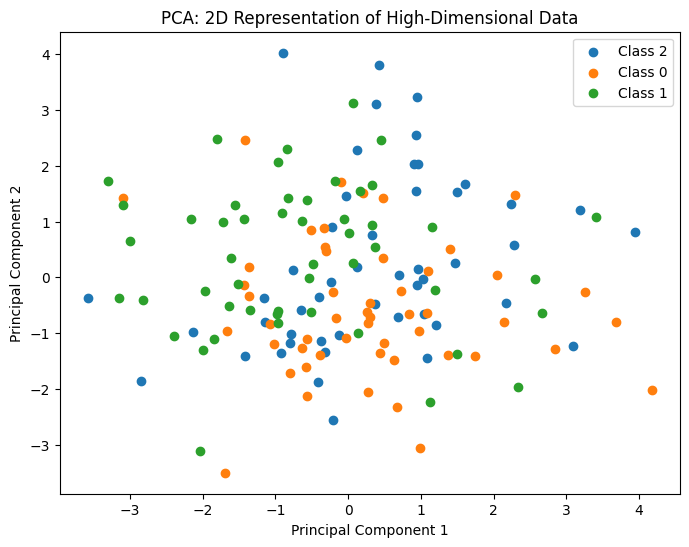

,PC1,PC2,Target
0,-0.404561,-0.345016,2
1,-0.172385,-0.731258,0
2,1.745920,-1.408364,0
3,-0.540974,-0.008167,1
4,-0.560626,-1.110791,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=150, n_features=10, n_informative=8, n_redundant=2, n_classes=3, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

# Define file path
file_path = "C:\\datasciences\\high_dimensional_dataset.csv"

# Save dataset to CSV
df.to_csv(file_path, index=False)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Target']))

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for reduced data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Save reduced dataset
reduced_file_path = "C:\\datasciences\\high_dimensional_dataset.csv"
df_pca.to_csv(reduced_file_path, index=False)

# Scatter plot of the reduced data
plt.figure(figsize=(8, 6))
for label in df_pca['Target'].unique():
    plt.scatter(df_pca[df_pca['Target'] == label]['PC1'], df_pca[df_pca['Target'] == label]['PC2'], label=f'Class {label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Representation of High-Dimensional Data')
plt.legend()
plt.show()

# Display first few rows of reduced dataset
df_pca.head()